In [1]:
using Plots
using CSV
using DataFrames
using StatsBase

## Sim Data  -> Low Variability

In [2]:
sim_data_path = "/Users/julietnwagwuume-ezeoke/My Drive/CS361_Optim/_fp_cs361/sim_data/0524_batch_00_00.csv"
sim_data = DataFrame(CSV.File(sim_data_path; drop=[1]))
# sim_data[!, "x1"]

,x1,x2,x3,x4,x5,x6,x7
,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,8.32988e9,9.68406e9,1.59901e10,1.2645e10,1.79989e10,1.45676e10,2.50205e10
2,8.20708e9,9.46297e9,1.54385e10,1.22124e10,1.71327e10,1.38496e10,2.35134e10
3,1.00951e10,1.15339e10,1.85627e10,1.46888e10,2.02608e10,1.63547e10,2.73824e10
4,8.28895e9,9.61037e9,1.58063e10,1.25008e10,1.77102e10,1.43283e10,2.45182e10
5,8.32988e9,9.68406e9,1.59901e10,1.2645e10,1.79989e10,1.45676e10,2.50205e10
6,9.25224e9,1.00386e10,1.49222e10,1.18358e10,1.47642e10,1.18487e10,1.82602e10
7,7.40767e9,8.04924e9,1.2015e10,9.52986e9,1.20099e10,9.6609e9,1.51077e10
8,8.33038e9,9.04526e9,1.34741e10,1.06872e10,1.34012e10,1.07678e10,1.67197e10
9,8.32953e9,9.04263e9,1.3463e10,1.06784e10,1.33729e10,1.07418e10,1.66482e10


## History Data

In [2]:
hist_data_path = "/Users/julietnwagwuume-ezeoke/My Drive/CS361_Optim/_fp_cs361/hist_data/elect.csv"
hist_data = DataFrame(CSV.File(hist_data_path; drop=[1]))

# hist_data[!, "0"]

,0
,Float64
1,4.96949e10
2,4.85494e10
3,4.47668e10
4,4.49106e10
5,5.42743e10
6,4.16979e10
7,4.09721e10
8,4.14693e10
9,4.1515e10


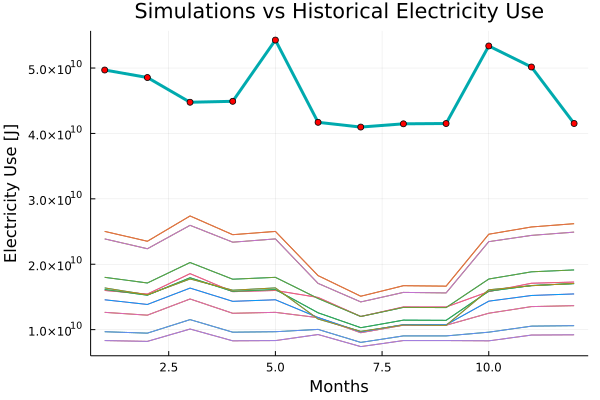

In [6]:
for i = 1:10
    plot!(sim_data[!, "x$i"], leg=false)
end

plot!(hist_data[!, "0"], linewidth=3, linestyle = :solid,
markershape= :circle, markercolor= :red, markersize=4,
label="historical", title="Simulations vs Historical Electricity Use", xlabel="Months", ylabel="Electricity Use [J]")

# RMSE

In [7]:
Y = Matrix(sim_data)
h = Matrix(hist_data)

12×1 Matrix{Float64}:
 4.969488797635679e10
 4.854941092244163e10
 4.4766776221326004e10
 4.491060873281641e10
 5.4274283592166794e10
 4.169789752583157e10
 4.0972087017759636e10
 4.14692987493636e10
 4.15149885016308e10
 5.337295014723481e10
 5.0157244633798836e10
 4.1521494332559616e10

In [10]:
y = []
for i=1:size(Y,2)
    append!(y, rmsd(Y[:, i], h, normalize=false))
end
y

10-element Vector{Any}:
 3.777970060207991e10
 3.662858985449671e10
 3.0888733912752155e10
 3.4092675974891712e10
 2.9642160140360226e10
 3.2838201353309464e10
 2.4014004997207428e10
 3.158433922959106e10
 2.5140619777620926e10
 3.1752359570181038e10

In [12]:
hgj = h./10e9 # GJ 

12×1 Matrix{Float64}:
 4.9694887976356785
 4.854941092244163
 4.4766776221326
 4.491060873281641
 5.427428359216679
 4.169789752583157
 4.097208701775964
 4.14692987493636
 4.15149885016308
 5.337295014723481
 5.015724463379883
 4.152149433255961

In [11]:
Ygj = Y./10e9


12×10 Matrix{Float64}:
 0.832988  0.968406  1.59901  …  2.50205  1.61316  2.38741  1.6382
 0.820708  0.946297  1.54385     2.35134  1.52689  2.23676  1.5326
 1.00951   1.15339   1.85627     2.73824  1.79357  2.59508  1.77496
 0.828895  0.961037  1.58063     2.45181  1.58441  2.33719  1.603
 0.832988  0.968406  1.59901     2.50205  1.61316  2.38741  1.6382
 0.925224  1.00387   1.49222  …  1.82602  1.25769  1.70699  1.16213
 0.740767  0.804924  1.2015      1.51077  1.02997  1.42385  0.973923
 0.833038  0.904526  1.34741     1.67197  1.14553  1.56958  1.07119
 0.832953  0.904263  1.34631     1.66482  1.14213  1.56126  1.06487
 0.828979  0.961298  1.58173     2.45895  1.5878   2.34551  1.60932
 0.917156  1.05353   1.70925  …  2.56991  1.67461  2.44103  1.67138
 0.921249  1.0609    1.72764     2.62014  1.70337  2.49125  1.70658

In [14]:
ygj = []
for i=1:size(Ygj,2)
    append!(ygj, rmsd(Ygj[:, i], hgj, normalize=false))
end
ygj

10-element Vector{Any}:
 3.7779700602079904
 3.662858985449671
 3.0888733912752153
 3.4092675974891713
 2.9642160140360225
 3.283820135330946
 2.4014004997207428
 3.158433922959106
 2.5140619777620925
 3.1752359570181037

# Plot in GJ

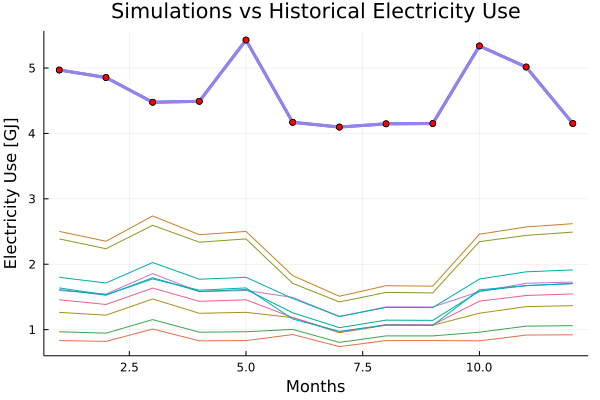

In [18]:


for i = 1:10
    plot!(sim_data[!, "x$i"]./10e9, leg=false)
end

plot!(hist_data[!, "0"]./10e9, linewidth=3, linestyle = :solid,
markershape= :circle, markercolor= :red, markersize=4,
label="historical", title="Simulations vs Historical Electricity Use", xlabel="Months", ylabel="Electricity Use [GJ]")



# Sensitivity Analysis

In [3]:
sim_data_path = "/Users/julietnwagwuume-ezeoke/My Drive/CS361_Optim/_fp_cs361/sim_data/0525_batch_00_01.csv"
sim_data = DataFrame(CSV.File(sim_data_path; drop=[1]))

,x1,x2,x3,x4,x5,x6,x7,x8
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,1.71028e9,2.82415e9,4.0626e9,5.4256e9,6.91317e9,8.52528e9,1.0262e10,1.71028e9
2,1.69693e9,2.78124e9,3.97385e9,5.27477e9,6.68401e9,8.20156e9,9.82742e9,1.69693e9
3,2.10339e9,3.41931e9,4.84898e9,6.39236e9,8.04947e9,9.82031e9,1.17049e10,2.10339e9
4,1.70583e9,2.80985e9,4.03302e9,5.37533e9,6.83678e9,8.41738e9,1.01171e10,1.70583e9
5,1.71028e9,2.82415e9,4.0626e9,5.4256e9,6.91317e9,8.52528e9,1.0262e10,1.71028e9
6,2.011e9,3.12534e9,4.24803e9,5.38289e9,6.53377e9,7.70448e9,8.89887e9,2.011e9
7,1.60914e9,2.50255e9,3.40554e9,4.32255e9,5.25796e9,6.21618e9,7.20163e9,1.60914e9
8,1.8101e9,2.8141e9,3.8273e9,4.85388e9,5.89808e9,6.96409e9,8.05615e9,1.8101e9
9,1.81005e9,2.81378e9,3.82628e9,4.85156e9,5.89365e9,6.95658e9,8.04436e9,1.81005e9


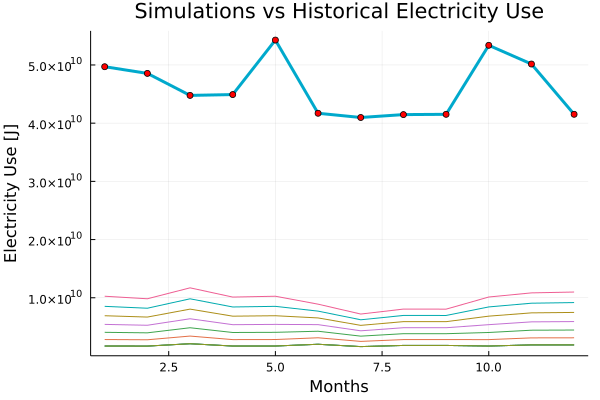

In [4]:
for i = 1:10
    plot!(sim_data[!, "x$i"], leg=false)
end

plot!(hist_data[!, "0"], linewidth=3, linestyle = :solid,
markershape= :circle, markercolor= :red, markersize=4,
label="historical", title="Simulations vs Historical Electricity Use", xlabel="Months", ylabel="Electricity Use [J]")